In [94]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb

SchoolProfile_filename = '../../SchoolData/data_2011_school_profile.csv'
data = pd.read_csv(SchoolProfile_filename)

SchoolGrad_Absences_filename = '../../SchoolData/data_2011_School-Attendance-and-Graduation.csv'
SchoolGrad_Absences_data = pd.read_csv(SchoolGrad_Absences_filename)

In [95]:
dataFields = SchoolGrad_Absences_data.columns.values.tolist()
#dataFields

In [96]:
JoinedData = data.merge(SchoolGrad_Absences_data, left_on=['SCHOOL_ID','DISTRICT'], right_on=['SCHOOL_ID','DISTRICT'])

JoinedData['ALL_GRAD_COUNT'] = JoinedData['ALL_GRAD_RATE']*JoinedData['TOTAL']/100

School_Profile_Groups = []

#JoinedData[['SCHOOL_NAME_x','SCHOOL_NAME_y']]

In [97]:
JoinedDataFields = JoinedData.columns.values.tolist()
#JoinedDataFields
#set(JoinedData.GRADES_SERVED)
#JoinedData.groupby(['GRADES_SERVED']).get_group('Grades 9-12').TOTAL.sum()
#JoinedData.query('GRADES_SERVED == "Grades 9-12"').TOTAL.sum()

In [98]:
def printSummary(query, label):
    student_count = 0
    white_student_count = 0
    black_student_count = 0
    hispanic_student_count = 0
    economically_disadvantaged_student_count = 0
    graduate_count = 0
    label_no_spaces = label.replace(' ', '_')
    
    gb = JoinedData.query(query)
    student_count = gb.TOTAL.sum()
    white_student_count = gb.WHITE.sum()
    black_student_count = gb.AFRICAN_AMERICAN.sum()
    hispanic_student_count = gb.HISPANIC.sum()
    economically_disadvantaged_student_count = gb.ECONOMICALLY_DISADVANTAGED.sum()
    graduate_count = gb.ALL_GRAD_COUNT.sum()
    graduation_pct = (graduate_count/student_count)*100           
    School_Profile_Groups.append({'name': label_no_spaces, 
                                  'students': student_count, 
                                  'white_students': white_student_count, 
                                  'black_students': black_student_count, 
                                  'hispanic_students': hispanic_student_count, 
                                  'economically_disadvantaged_students': economically_disadvantaged_student_count, 
                                  'graduation_pct': graduation_pct})

    print(label)
    print('All Students: ' + str(int(student_count)))
    print('White Students: ' + str(int(white_student_count)))
    print('Black Students: ' + str(int(black_student_count)))
    print('Hispanic Students: ' + str(int(hispanic_student_count)))

    print('Economically Disadvantaged Students: ' + str(int(economically_disadvantaged_student_count)))
    print('Student Graduation percentage: ' + str(int(graduation_pct)))
    print('Query used:', query)

In [99]:
printSummary('GRADES_SERVED == "Grades 9-12"', 'All TN High Schools')

All TN High Schools
All Students: 269847
White Students: 182630
Black Students: 68729
Hispanic Students: 13023
Economically Disadvantaged Students: 128140
Student Graduation percentage: 86
Query used: GRADES_SERVED == "Grades 9-12"


In [100]:
def printHSSummary(query, label):
    printSummary(query + " and GRADES_SERVED == 'Grades 9-12'", label)
    
printHSSummary("DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County')", 
             'TN Urban High Schools')

TN Urban High Schools
All Students: 61438
White Students: 32984
Black Students: 21934
Hispanic Students: 4482
Economically Disadvantaged Students: 26926
Student Graduation percentage: 83
Query used: DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County') and GRADES_SERVED == 'Grades 9-12'


In [101]:
def printHSRangeSummary(fieldName, low, high, fieldLabel):
    if high == 100:
        high1 = 101
    else:
        high1 = high
    printHSSummary(str(low) + " <= " + fieldName + " and " + fieldName + " < " + str(high1), 
             'TN High Schools with ' + str(low) + '-' + str(high) + fieldLabel)  
    
def printHSRacialSummary(low, high):
    printHSRangeSummary('WHITE_PCT', low, high, '% White Students')
    
printHSRacialSummary(0, 25)

TN High Schools with 0-25% White Students
All Students: 41274
White Students: 3152
Black Students: 34918
Hispanic Students: 2696
Economically Disadvantaged Students: 32072
Student Graduation percentage: 74
Query used: 0 <= WHITE_PCT and WHITE_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [102]:
printHSRacialSummary(25, 50)

TN High Schools with 25-50% White Students
All Students: 29920
White Students: 12075
Black Students: 13443
Hispanic Students: 3003
Economically Disadvantaged Students: 15206
Student Graduation percentage: 84
Query used: 25 <= WHITE_PCT and WHITE_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [103]:
printHSRacialSummary(50, 75)

TN High Schools with 50-75% White Students
All Students: 38871
White Students: 25514
Black Students: 9573
Hispanic Students: 2530
Economically Disadvantaged Students: 14891
Student Graduation percentage: 88
Query used: 50 <= WHITE_PCT and WHITE_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [104]:
printHSRacialSummary(75, 100)

TN High Schools with 75-100% White Students
All Students: 157796
White Students: 141889
Black Students: 8826
Hispanic Students: 4779
Economically Disadvantaged Students: 64842
Student Graduation percentage: 89
Query used: 75 <= WHITE_PCT and WHITE_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [105]:
def printHSEconSummary(low, high):
    printHSRangeSummary('ECONOMICALLY_DISADVANTAGED_PCT', low, high, '% Economically Disadvantaged Students')
    
printHSEconSummary(0, 25)

TN High Schools with 0-25% Economically Disadvantaged Students
All Students: 23982
White Students: 19915
Black Students: 2458
Hispanic Students: 685
Economically Disadvantaged Students: 3197
Student Graduation percentage: 92
Query used: 0 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [106]:
printHSEconSummary(25, 50)

TN High Schools with 25-50% Economically Disadvantaged Students
All Students: 89076
White Students: 69191
Black Students: 13726
Hispanic Students: 3964
Economically Disadvantaged Students: 30037
Student Graduation percentage: 90
Query used: 25 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [107]:
printHSEconSummary(50, 75)

TN High Schools with 50-75% Economically Disadvantaged Students
All Students: 106315
White Students: 81135
Black Students: 17502
Hispanic Students: 5809
Economically Disadvantaged Students: 56794
Student Graduation percentage: 87
Query used: 50 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [108]:
printHSEconSummary(75, 100)

TN High Schools with 75-100% Economically Disadvantaged Students
All Students: 49582
White Students: 12194
Black Students: 34369
Hispanic Students: 2547
Economically Disadvantaged Students: 38112
Student Graduation percentage: 75
Query used: 75 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [110]:
groupData = pd.DataFrame(School_Profile_Groups)
groupData = groupData[['name','students', 'white_students','black_students','hispanic_students', 'economically_disadvantaged_students',  
                       'graduation_pct']]
groupData

,name,students,white_students,black_students,hispanic_students,economically_disadvantaged_students,graduation_pct
0,All_TN_High_Schools,269847.0,182630.0,68729.0,13023.0,128140.0,86.489142
1,TN_Urban_High_Schools,61438.0,32984.0,21934.0,4482.0,26926.0,83.412523
2,TN_High_Schools_with_0-25%_White_Students,41274.0,3152.0,34918.0,2696.0,32072.0,74.915102
3,TN_High_Schools_with_25-50%_White_Students,29920.0,12075.0,13443.0,3003.0,15206.0,84.376106
4,TN_High_Schools_with_50-75%_White_Students,38871.0,25514.0,9573.0,2530.0,14891.0,88.381758
5,TN_High_Schools_with_75-100%_White_Students,157796.0,141889.0,8826.0,4779.0,64842.0,89.596047
6,TN_High_Schools_with_0-25%_Economically_Disadv...,23982.0,19915.0,2458.0,685.0,3197.0,92.347619
7,TN_High_Schools_with_25-50%_Economically_Disad...,89076.0,69191.0,13726.0,3964.0,30037.0,90.150238
8,TN_High_Schools_with_50-75%_Economically_Disad...,106315.0,81135.0,17502.0,5809.0,56794.0,87.170332
9,TN_High_Schools_with_75-100%_Economically_Disa...,49582.0,12194.0,34369.0,2547.0,38112.0,75.884194


In [111]:
def GradPctPie(row):
    labels = [groupData.name[row],'']
    sizes = [groupData.graduation_pct[row], 100 - groupData.graduation_pct[row]]
    colors = ['yellowgreen', 'gold']
    explode = (0, 0.1)  

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    print('Graduation Percentage:')
    plt.show()

Graduation Percentage:


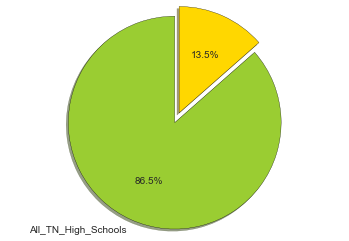

Graduation Percentage:


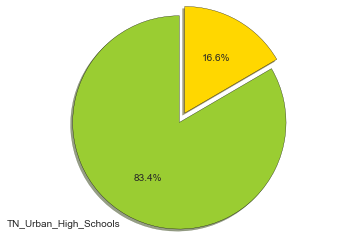

Graduation Percentage:


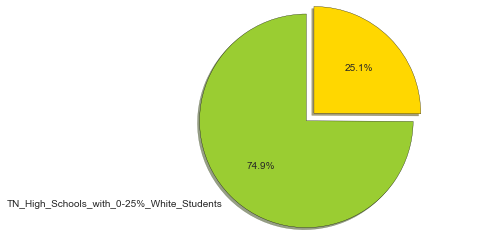

Graduation Percentage:


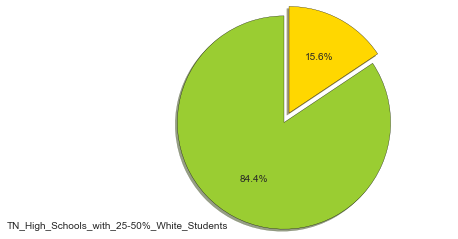

Graduation Percentage:


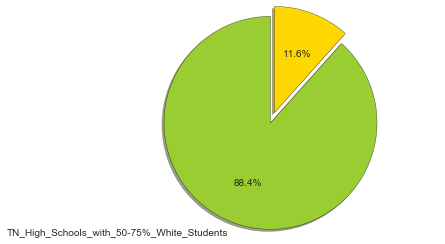

Graduation Percentage:


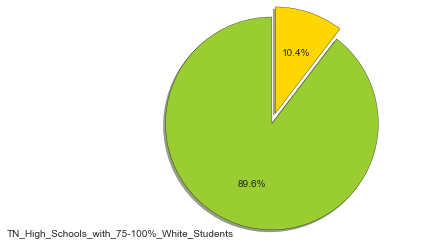

Graduation Percentage:


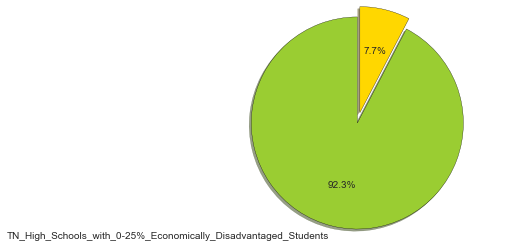

Graduation Percentage:


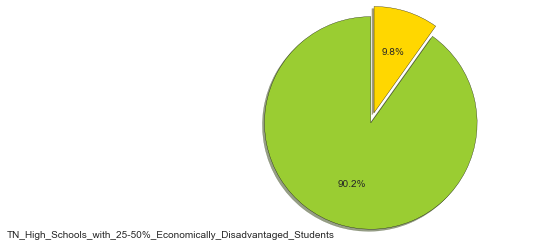

Graduation Percentage:


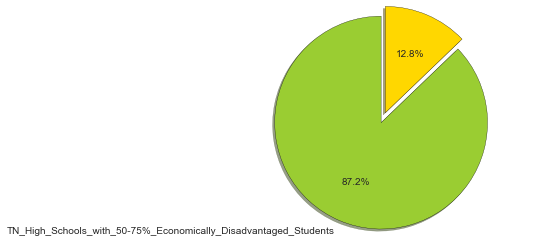

Graduation Percentage:


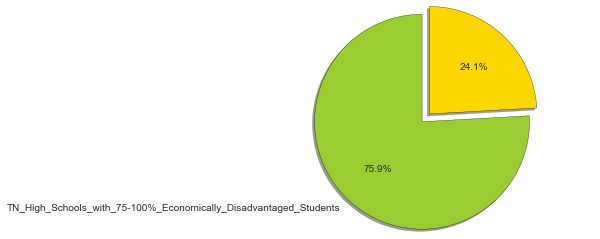

In [112]:
for i in range (0,10):
    GradPctPie(i)